# The GroupBy Object

In [78]:
import pandas as pd

## The Fortune 1000 Dataset
- The **Fortune 1000** is a listing of the 1000 largest American companies as ranked by Fortune magazine.
- The **DataFrame** includes the company's name, sector, industry, and revenues, profits, and employees.

In [79]:
fortune = pd.read_csv('fortune1000.csv', index_col='Rank')
fortune.head()

,Company,Sector,Industry,Revenue,Profits,Employees
Rank,,,,,,
1,Walmart,Retailing,General Merchandisers,482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,181241,1476,70400


## The groupby Method
- **Grouping** is a way to organize/categorize/group the data based on a column's values.
- The `groupby` method returns a **DataFrameGroupBy** object. It resembles a group/collection of **DataFrames** in a dictionary-like structure.
- The **DataFrameGroupBy** object can perform aggregate operations on *each* group within it.

In [80]:
# 1. traz um dataframe da pesquisa 
# 2. da pesquisa, seleciona a coluna 'Revenue'
# 3. soma a série
fortune[fortune['Sector'] == 'Retailing']['Revenue'].sum()

np.int64(1465076)

In [81]:
# vai gerar um DF para cada tipo único de valor da coluna Sector
sectors = fortune.groupby('Sector')

In [82]:
# 21 tipos de setores
len(sectors)

21

In [83]:
sectors.size().sort_index()

Sector
Aerospace & Defense              20
Apparel                          15
Business Services                51
Chemicals                        30
Energy                          122
Engineering & Construction       26
Financials                      139
Food and Drug Stores             15
Food, Beverages & Tobacco        43
Health Care                      75
Hotels, Resturants & Leisure     25
Household Products               28
Industrials                      46
Materials                        43
Media                            25
Motor Vehicles & Parts           24
Retailing                        80
Technology                      102
Telecommunications               15
Transportation                   36
Wholesalers                      40
dtype: int64

In [84]:
# vai trazer o 1° valor de cada TIPO de cada DF (neste caso, do Sector)
sectors.first().head()

,Company,Industry,Revenue,Profits,Employees
Sector,,,,,
Aerospace & Defense,Boeing,Aerospace and Defense,96114,5176,161400
Apparel,Nike,Apparel,30601,3273,62600
Business Services,ManpowerGroup,Temporary Help,19330,419,27000
Chemicals,Dow Chemical,Chemicals,48778,7685,49495
Energy,Exxon Mobil,Petroleum Refining,246204,16150,75600


In [85]:
sectors.last().head()

,Company,Industry,Revenue,Profits,Employees
Sector,,,,,
Aerospace & Defense,Delta Tucker Holdings,Aerospace and Defense,1923,-133,12000
Apparel,Guess,Apparel,2204,82,13500
Business Services,DeVry Education Group,Education,1910,140,11770
Chemicals,H.B. Fuller,Chemicals,2084,87,4425
Energy,Portland General Electric,Utilities: Gas and Electric,1898,172,2646


## Retrieve a Group with the get_group Method
- The `get_group` method on the **DataFrameGroupBy** object retrieves a nested **DataFrame** belonging to a specific group/category.

In [86]:
sectors.get_group('Energy')

,Company,Sector,Industry,Revenue,Profits,Employees
Rank,,,,,,
2,Exxon Mobil,Energy,Petroleum Refining,246204,16150,75600
14,Chevron,Energy,Petroleum Refining,131118,4587,61500
30,Phillips 66,Energy,Petroleum Refining,87169,4227,14000
32,Valero Energy,Energy,Petroleum Refining,81824,3990,10103
42,Marathon Petroleum,Energy,Petroleum Refining,64566,2852,45440
...,...,...,...,...,...,...
981,WPX Energy,Energy,"Mining, Crude-Oil Production",1958,-1727,1040
983,Adams Resources & Energy,Energy,Petroleum Refining,1944,-1,809
995,EP Energy,Energy,"Mining, Crude-Oil Production",1908,-3748,665


## Methods on the GroupBy Object
- Use square brackets on the **DataFrameGroupBy** object to "extract" a column from the original **DataFrame**.
- The resulting **SeriesGroupBy** object will have aggregation methods available on it.
- Pandas will perform the calculation on *every* group within the collection.
- For example, the `sum` method will sum together the **Revenues** for every row by group/category.

In [87]:
# Ele soma os valores da coluna Revenue em cada grupo.
sectors['Revenue'].sum()

Sector
Aerospace & Defense              357940
Apparel                           95968
Business Services                272195
Chemicals                        243897
Energy                          1517809
Engineering & Construction       153983
Financials                      2217159
Food and Drug Stores             483769
Food, Beverages & Tobacco        555967
Health Care                     1614707
Hotels, Resturants & Leisure     169546
Household Products               234737
Industrials                      497581
Materials                        259145
Media                            220764
Motor Vehicles & Parts           482540
Retailing                       1465076
Technology                      1377600
Telecommunications               461834
Transportation                   408508
Wholesalers                      444800
Name: Revenue, dtype: int64

In [88]:
fortune[fortune['Sector'] == 'Apparel']['Revenue'].sum()

np.int64(95968)

In [89]:
# Número de colaboradores por tipo de setor (em 100k)
sectors['Employees'].max().sort_values(ascending=False).div(100_000).round(2)

Sector
Retailing                       23.00
Hotels, Resturants & Leisure     5.05
Food and Drug Stores             4.31
Technology                       4.12
Transportation                   3.41
Industrials                      3.33
Financials                       3.31
Telecommunications               2.81
Food, Beverages & Tobacco        2.63
Business Services                2.16
Motor Vehicles & Parts           2.15
Health Care                      2.04
Aerospace & Defense              1.97
Media                            1.85
Household Products               1.10
Engineering & Construction       0.92
Wholesalers                      0.78
Energy                           0.76
Apparel                          0.65
Materials                        0.60
Chemicals                        0.52
Name: Employees, dtype: float64

In [90]:
sectors['Employees'].max().sort_values(ascending=False).div(100_000).values
sectors['Employees'].max().sort_values(ascending=False).index

Index(['Retailing', 'Hotels, Resturants & Leisure', 'Food and Drug Stores',
       'Technology', 'Transportation', 'Industrials', 'Financials',
       'Telecommunications', 'Food, Beverages & Tobacco', 'Business Services',
       'Motor Vehicles & Parts', 'Health Care', 'Aerospace & Defense', 'Media',
       'Household Products', 'Engineering & Construction', 'Wholesalers',
       'Energy', 'Apparel', 'Materials', 'Chemicals'],
      dtype='object', name='Sector')

In [91]:
# Pega a 2 colunas de todos os DF, soma cada um, e traz em um DF central pelo tipo de setor.
sectors[['Revenue','Profits']].sum()

,Revenue,Profits
Sector,,
Aerospace & Defense,357940,28742
Apparel,95968,8236
Business Services,272195,28227
Chemicals,243897,22628
Energy,1517809,-73447
Engineering & Construction,153983,5304
Financials,2217159,260209
Food and Drug Stores,483769,16759
"Food, Beverages & Tobacco",555967,51417


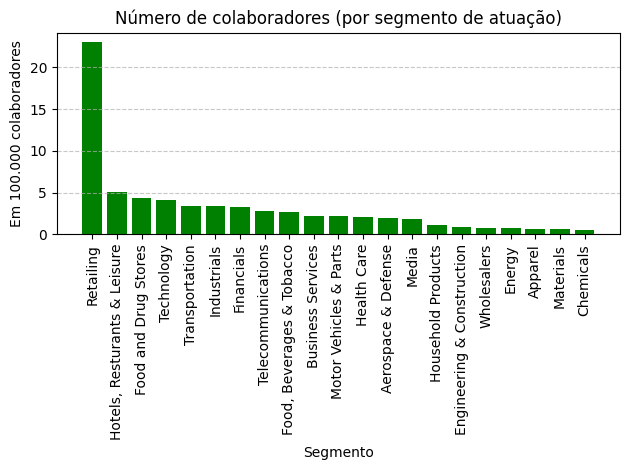

In [94]:
import matplotlib.pyplot as plt

# Rótulos para cada barra (representando trimestres, por exemplo)
labels = sectors['Employees'].max().sort_values(ascending=False).index
qtd_funcionarios = sectors['Employees'].max().sort_values(ascending=False).div(100_000).values

# Criar o gráfico de barras
plt.bar(
    x=labels, 
    height=qtd_funcionarios, 
    color='g',
    )

# Adicionar título e rótulos aos eixos
plt.title('Número de colaboradores (por segmento de atuação)')
plt.xlabel('Segmento')
plt.ylabel('Em 100.000 colaboradores')
plt.xticks(rotation=90)

# Exibir o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Grouping by Multiple Columns
- Pass a list of columns to the **groupby** method to group by pairings of values across columns.
- Target a column to retrieve the **SeriesGroupBy** object, then perform an aggregation with a method.
- Pandas will return a **MultiIndex** **Series** where the levels will be the original groups.

In [95]:
fortune.head()

,Company,Sector,Industry,Revenue,Profits,Employees
Rank,,,,,,
1,Walmart,Retailing,General Merchandisers,482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,181241,1476,70400


In [ ]:
# estratifica Setor x Industria
sectors = fortune.groupby(['Sector','Industry'])
sectors.size()

Sector               Industry                                     
Aerospace & Defense  Aerospace and Defense                            20
Apparel              Apparel                                          15
Business Services    Advertising, marketing                            2
                     Diversified Outsourcing Services                 14
                     Education                                         3
                                                                      ..
Transportation       Trucking, Truck Leasing                           9
Wholesalers          Miscellaneous                                     1
                     Wholesalers: Diversified                         25
                     Wholesalers: Electronics and Office Equipment     8
                     Wholesalers: Food and Grocery                     6
Length: 79, dtype: int64

In [97]:
sectors['Revenue'].sum()

Sector               Industry                                     
Aerospace & Defense  Aerospace and Defense                            357940
Apparel              Apparel                                           95968
Business Services    Advertising, marketing                            22748
                     Diversified Outsourcing Services                  64829
                     Education                                          7485
                                                                       ...  
Transportation       Trucking, Truck Leasing                           35950
Wholesalers          Miscellaneous                                      8982
                     Wholesalers: Diversified                         176138
                     Wholesalers: Electronics and Office Equipment    147906
                     Wholesalers: Food and Grocery                    111774
Name: Revenue, Length: 79, dtype: int64

## The agg Method
- The `agg` method applies different aggregation methods on different columns.
- Invoke the `agg` method directly on the **DataFrameGroupBy** object.
- Pass the method a dictionary where the keys are the columns and the values are the aggregation operations.

In [98]:
fortune = pd.read_csv('fortune1000.csv', index_col='Rank')
sectors = fortune.groupby('Sector')
fortune.head()

,Company,Sector,Industry,Revenue,Profits,Employees
Rank,,,,,,
1,Walmart,Retailing,General Merchandisers,482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,181241,1476,70400


In [102]:
# Aqui se obtem um tabela. Já no modelo anterior gera uma Série.
sectors.agg({
    'Revenue':'sum', # retorna a soma de todos os valores.
    'Profits':'max', # retorna uma coluna com o maior número de cada df.
})

,Revenue,Profits
Sector,,
Aerospace & Defense,357940,7608
Apparel,95968,3273
Business Services,272195,6328
Chemicals,243897,7685
Energy,1517809,16150
Engineering & Construction,153983,803
Financials,2217159,24442
Food and Drug Stores,483769,5237
"Food, Beverages & Tobacco",555967,7351


## Iterating through Groups 
- The **DataFrameGroupBy** object supports the `apply` method (just like a **Series** and a **DataFrame** do).
- The `apply` method invokes a function on every nested **DataFrame** in the **DataFrameGroupBy** object.
- It captures the return values of the functions and collects them in a new **DataFrame** (the return value).

In [103]:
fortune.nlargest(2, 'Employees')

,Company,Sector,Industry,Revenue,Profits,Employees
Rank,,,,,,
1,Walmart,Retailing,General Merchandisers,482130,14694,2300000
218,Yum Brands,"Hotels, Resturants & Leisure",Food Services,13105,1293,505000


In [ ]:
# O apply() aplica a função top_two_companies_by_employee_count a cada sub-DataFrame criado pelo groupby.
def top_two_companies_by_employee_count(sector):
    return sector.nlargest(2, 'Employees')

sectors.apply(top_two_companies_by_employee_count)

C:\Users\f0fp0228\AppData\Local\Temp\ipykernel_18884\1601543923.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sectors.apply(top_two_companies_by_employee_count)


Company  \
Sector                       Rank                             
Aerospace & Defense          45         United Technologies   
                             24                      Boeing   
Apparel                      448                Hanesbrands   
                             231                         VF   
Business Services            199                    Aramark   
                             744                  Convergys   
Chemicals                    101                     DuPont   
                             56                Dow Chemical   
Energy                       2                  Exxon Mobil   
                             117                Halliburton   
Engineering & Construction   156                      AECOM   
                             235   Jacobs Engineering Group   
Financials                   4           Berkshire Hathaway   
                             27                 Wells Fargo   
Food and Drug Stores         17                      Kroger   
                             19    Walgreens Boots Alliance   
Food, Beverages & Tobacco    44                     PepsiCo   
                             62                   Coca-Cola   
Health Care                  63                HCA Holdings   
                             6           UnitedHealth Group   
Hotels, Resturants & Leisure 218                 Yum Brands   
                             109                 McDonald’s   
Household Products           34            Procter & Gamble   
                             256     Stanley Black & Decker   
Industrials                  11            General Electric   
                             75     Honeywell International   
Materials                    126                      Alcoa   
                             127        International Paper   
Media                        53                      Disney   
                             255      R.R. Donnelley & Sons   
Motor Vehicles & Parts       8               General Motors   
                             9                   Ford Motor   
Retailing                    1                      Walmart   
                             28                  Home Depot   
Technology                   31                         IBM   
                             20                          HP   
Telecommunications           10                        AT&T   
                             13                     Verizon   
Transportation               48                         UPS   
                             58                       FedEx   
Wholesalers                  212                     Synnex   
                             57                       Sysco   

                                                         Sector  \
Sector                       Rank                                 
Aerospace & Defense          45             Aerospace & Defense   
                             24             Aerospace & Defense   
Apparel                      448                        Apparel   
                             231                        Apparel   
Business Services            199              Business Services   
                             744              Business Services   
Chemicals                    101                      Chemicals   
                             56                       Chemicals   
Energy                       2                           Energy   
                             117                         Energy   
Engineering & Construction   156     Engineering & Construction   
                             235     Engineering & Construction   
Financials                   4                       Financials   
                             27                      Financials   
Food and Drug Stores         17            Food and Drug Stores   
                             19            Food and Drug Stores   
Food, Beverages & Tobacco    44       Food, Beverages & Tobacco   
      